# DATA ANAYLSIS OF AIRBNB HOTEL BOOKING DATA

## Data Preprocessing

### Importing Libraries

In [35]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 

### Loading Uncleaned Data 

In [36]:
df=pd.read_csv(r'C:\DataScience\data\Airbnb_data.csv')

### Data Cleaning

In [37]:

df.isna().sum()

id                            0
log_price                     0
property_type                 0
room_type                     0
amenities                     0
accommodates                  0
bathrooms                   200
bed_type                      0
cancellation_policy           0
cleaning_fee                  0
city                          0
description                   0
first_review              15864
host_has_profile_pic        188
host_identity_verified      188
host_response_rate        18299
host_since                  188
instant_bookable              0
last_review               15827
latitude                      0
longitude                     0
name                          0
neighbourhood              6872
number_of_reviews             0
review_scores_rating      16722
thumbnail_url              8216
zipcode                     966
bedrooms                     91
beds                        131
dtype: int64

In [38]:
df.shape

(74111, 29)

#### Dropping useless coloumns for this project

In [39]:
df.drop(columns=['id','description','host_has_profile_pic','latitude','longitude','thumbnail_url','zipcode','host_identity_verified','last_review','first_review','host_response_rate'],inplace=True)

In [40]:
df.duplicated().sum()

6

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74111 entries, 0 to 74110
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   log_price             74111 non-null  float64
 1   property_type         74111 non-null  object 
 2   room_type             74111 non-null  object 
 3   amenities             74111 non-null  object 
 4   accommodates          74111 non-null  int64  
 5   bathrooms             73911 non-null  float64
 6   bed_type              74111 non-null  object 
 7   cancellation_policy   74111 non-null  object 
 8   cleaning_fee          74111 non-null  bool   
 9   city                  74111 non-null  object 
 10  host_since            73923 non-null  object 
 11  instant_bookable      74111 non-null  object 
 12  name                  74111 non-null  object 
 13  neighbourhood         67239 non-null  object 
 14  number_of_reviews     74111 non-null  int64  
 15  review_scores_ratin

In [42]:
for i in df:
    j=i.replace(' ','_')
    df=df.rename(columns={i:j.capitalize()})

In [43]:
df.fillna({'Review_scores_rating': df['Review_scores_rating'].mean()}, inplace = True)



In [44]:
df.isna().sum()

Log_price                  0
Property_type              0
Room_type                  0
Amenities                  0
Accommodates               0
Bathrooms                200
Bed_type                   0
Cancellation_policy        0
Cleaning_fee               0
City                       0
Host_since               188
Instant_bookable           0
Name                       0
Neighbourhood           6872
Number_of_reviews          0
Review_scores_rating       0
Bedrooms                  91
Beds                     131
dtype: int64

### Interpolating necessary coloumns 

In [45]:
df[['Bathrooms','Bedrooms','Beds']]=df[['Bathrooms','Bedrooms','Beds']].interpolate()

In [46]:
df.isna().sum()

Log_price                  0
Property_type              0
Room_type                  0
Amenities                  0
Accommodates               0
Bathrooms                  0
Bed_type                   0
Cancellation_policy        0
Cleaning_fee               0
City                       0
Host_since               188
Instant_bookable           0
Name                       0
Neighbourhood           6872
Number_of_reviews          0
Review_scores_rating       0
Bedrooms                   0
Beds                       0
dtype: int64

In [47]:
df.dropna(axis=0,inplace=True)

In [48]:
df.isna().sum()

Log_price               0
Property_type           0
Room_type               0
Amenities               0
Accommodates            0
Bathrooms               0
Bed_type                0
Cancellation_policy     0
Cleaning_fee            0
City                    0
Host_since              0
Instant_bookable        0
Name                    0
Neighbourhood           0
Number_of_reviews       0
Review_scores_rating    0
Bedrooms                0
Beds                    0
dtype: int64

#### backup

In [49]:
df_copy=df.copy()

### DATA VISUALISATION

In [50]:
unsorted=df.groupby('Name').sum()

#### what types of properties are there and which one do the customers prefere more?

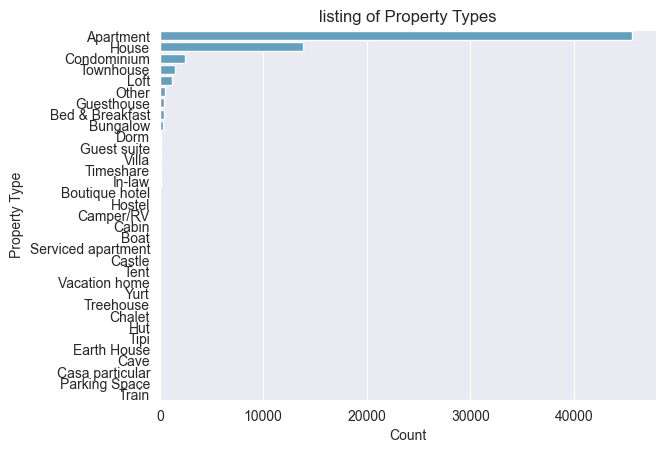

In [51]:
sns.set_style('darkgrid')
sns.countplot(data=df, y='Property_type', order=df['Property_type'].value_counts().index)
plt.title('listing of Property Types')
plt.xlabel('Count')
plt.ylabel('Property Type')
plt.show()

#### There are 33 types of properties and average of customers uses apartments 

#### how much is the average prices of all property types?

C:\Users\aditya\AppData\Local\Temp\ipykernel_836\3721342441.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df,palette=('pastel'), y='Property_type', x='Log_price',errorbar=None, order=df.groupby('Property_type')['Log_price'].mean().sort_values(ascending=False).index)


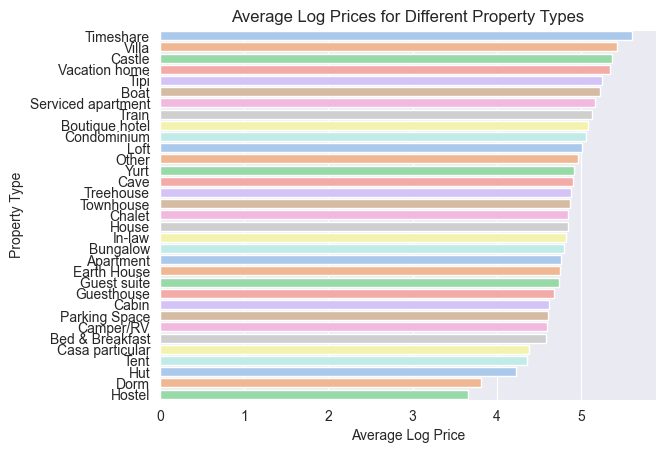

In [52]:

sns.set_style('darkgrid')
sns.barplot(data=df,palette=('pastel'), y='Property_type', x='Log_price',errorbar=None, order=df.groupby('Property_type')['Log_price'].mean().sort_values(ascending=False).index)
plt.title('Average Log Prices for Different Property Types')
plt.xlabel('Average Log Price')
plt.ylabel('Property Type')
plt.show()

#### hostels are the cheapeast and timeshare is the expensive type if properties

#### which ones are the most availables type of properties ?

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


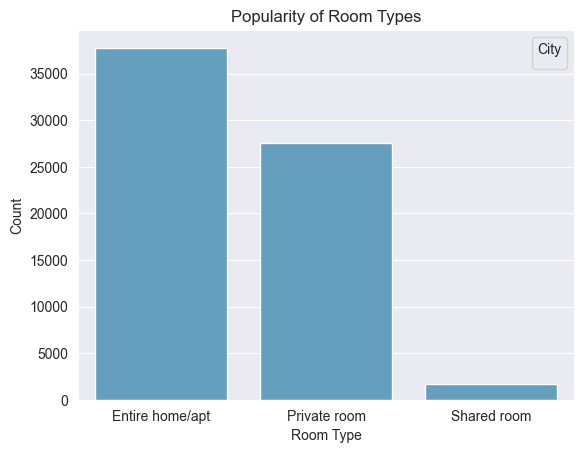

In [53]:
sns.countplot(data=df, x='Room_type', order=df['Room_type'].value_counts().index)
plt.title('Popularity of Room Types')
plt.xlabel('Room Type')
plt.ylabel('Count')
plt.legend(title='City')
plt.show()

#### shared rooms are very low compared to both private rooms and Entire home/apartments.There are more number of Entire home/apartments in the listings  

#### which state has more number of listings ?

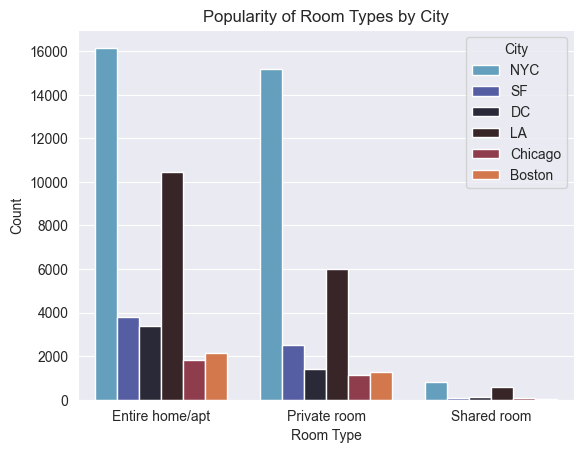

In [54]:
sns.countplot(data=df, x='Room_type', hue='City', order=df['Room_type'].value_counts().index)
plt.title('Popularity of Room Types by City')
plt.xlabel('Room Type')
plt.ylabel('Count')
plt.legend(title='City')
plt.show()

#### New york city has more number of listings in every property types

#### which ones are the most expensives in all the listings ?

Text(0.5, 1.0, 'EXPENSIVE TOP 10')

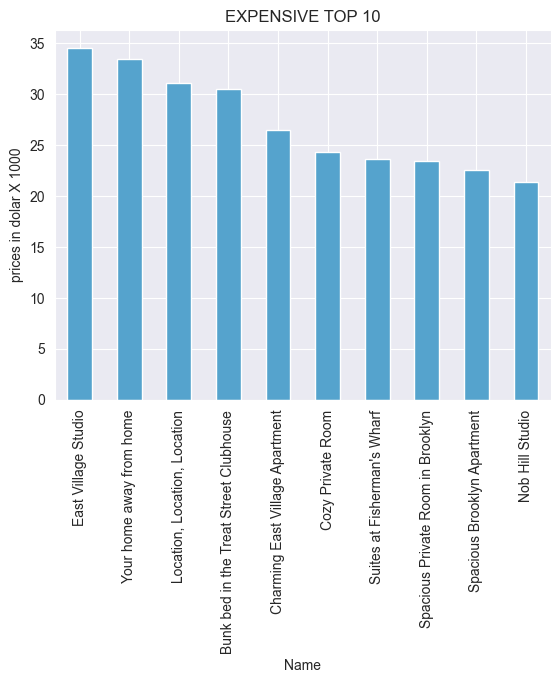

In [55]:
expensive_10=unsorted.sort_values(by='Log_price',ascending=False).head(10)
cheapest_10=unsorted.sort_values(by='Log_price',ascending=True).head(10)


sns.set_palette('icefire')

expensive_10["Log_price"].plot(kind='bar')
plt.ylabel('prices in dolar X 1000')
plt.title('EXPENSIVE TOP 10')

#### cheapest ones in the listings

Text(0.5, 1.0, 'cheapest')

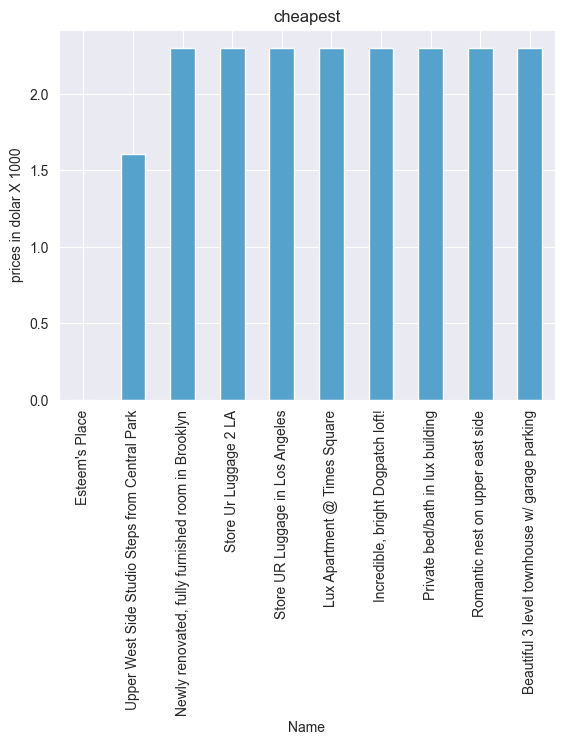

In [56]:
sns.set_palette('icefire')



cheapest_10["Log_price"].plot(kind='bar')
plt.ylabel('prices in dolar X 1000')
plt.title('cheapest')

#### which cities has most number of listings ?

####

C:\Users\aditya\AppData\Local\Temp\ipykernel_836\4039746280.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, palette='tab10',y='City', order=df['City'].value_counts().index)


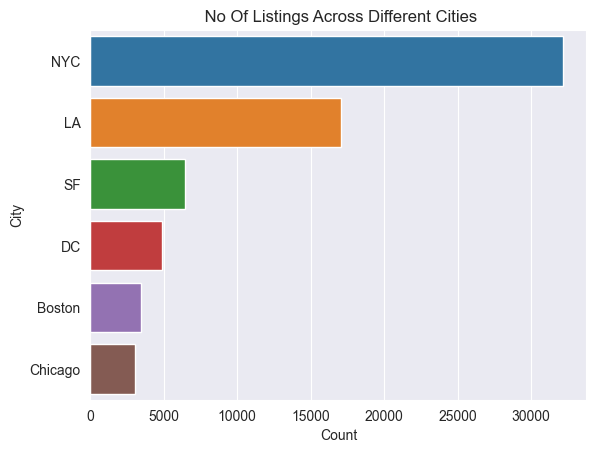

In [57]:
sns.countplot(data=df, palette='tab10',y='City', order=df['City'].value_counts().index)
plt.title(' No Of Listings Across Different Cities')
plt.xlabel('Count')
plt.ylabel('City')
plt.show()


In [58]:
df['City'].value_counts()

City
NYC        32165
LA         17040
SF          6426
DC          4893
Boston      3468
Chicago     3062
Name: count, dtype: int64

#### NEW YORK CITY Have the most number of listings. newyork city have 32165 number of listings
#### CHICAGO  has the least number of listings 3062

#### which ones are the top 10 neighbourhoods in each states which has most number of listings ?

C:\Users\aditya\AppData\Local\Temp\ipykernel_836\724602937.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(ax=axes[i],palette='tab10', data=city_data, y='Neighbourhood', order=city_data['Neighbourhood'].value_counts().head(10).index)
C:\Users\aditya\AppData\Local\Temp\ipykernel_836\724602937.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(ax=axes[i],palette='tab10', data=city_data, y='Neighbourhood', order=city_data['Neighbourhood'].value_counts().head(10).index)
C:\Users\aditya\AppData\Local\Temp\ipykernel_836\724602937.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend

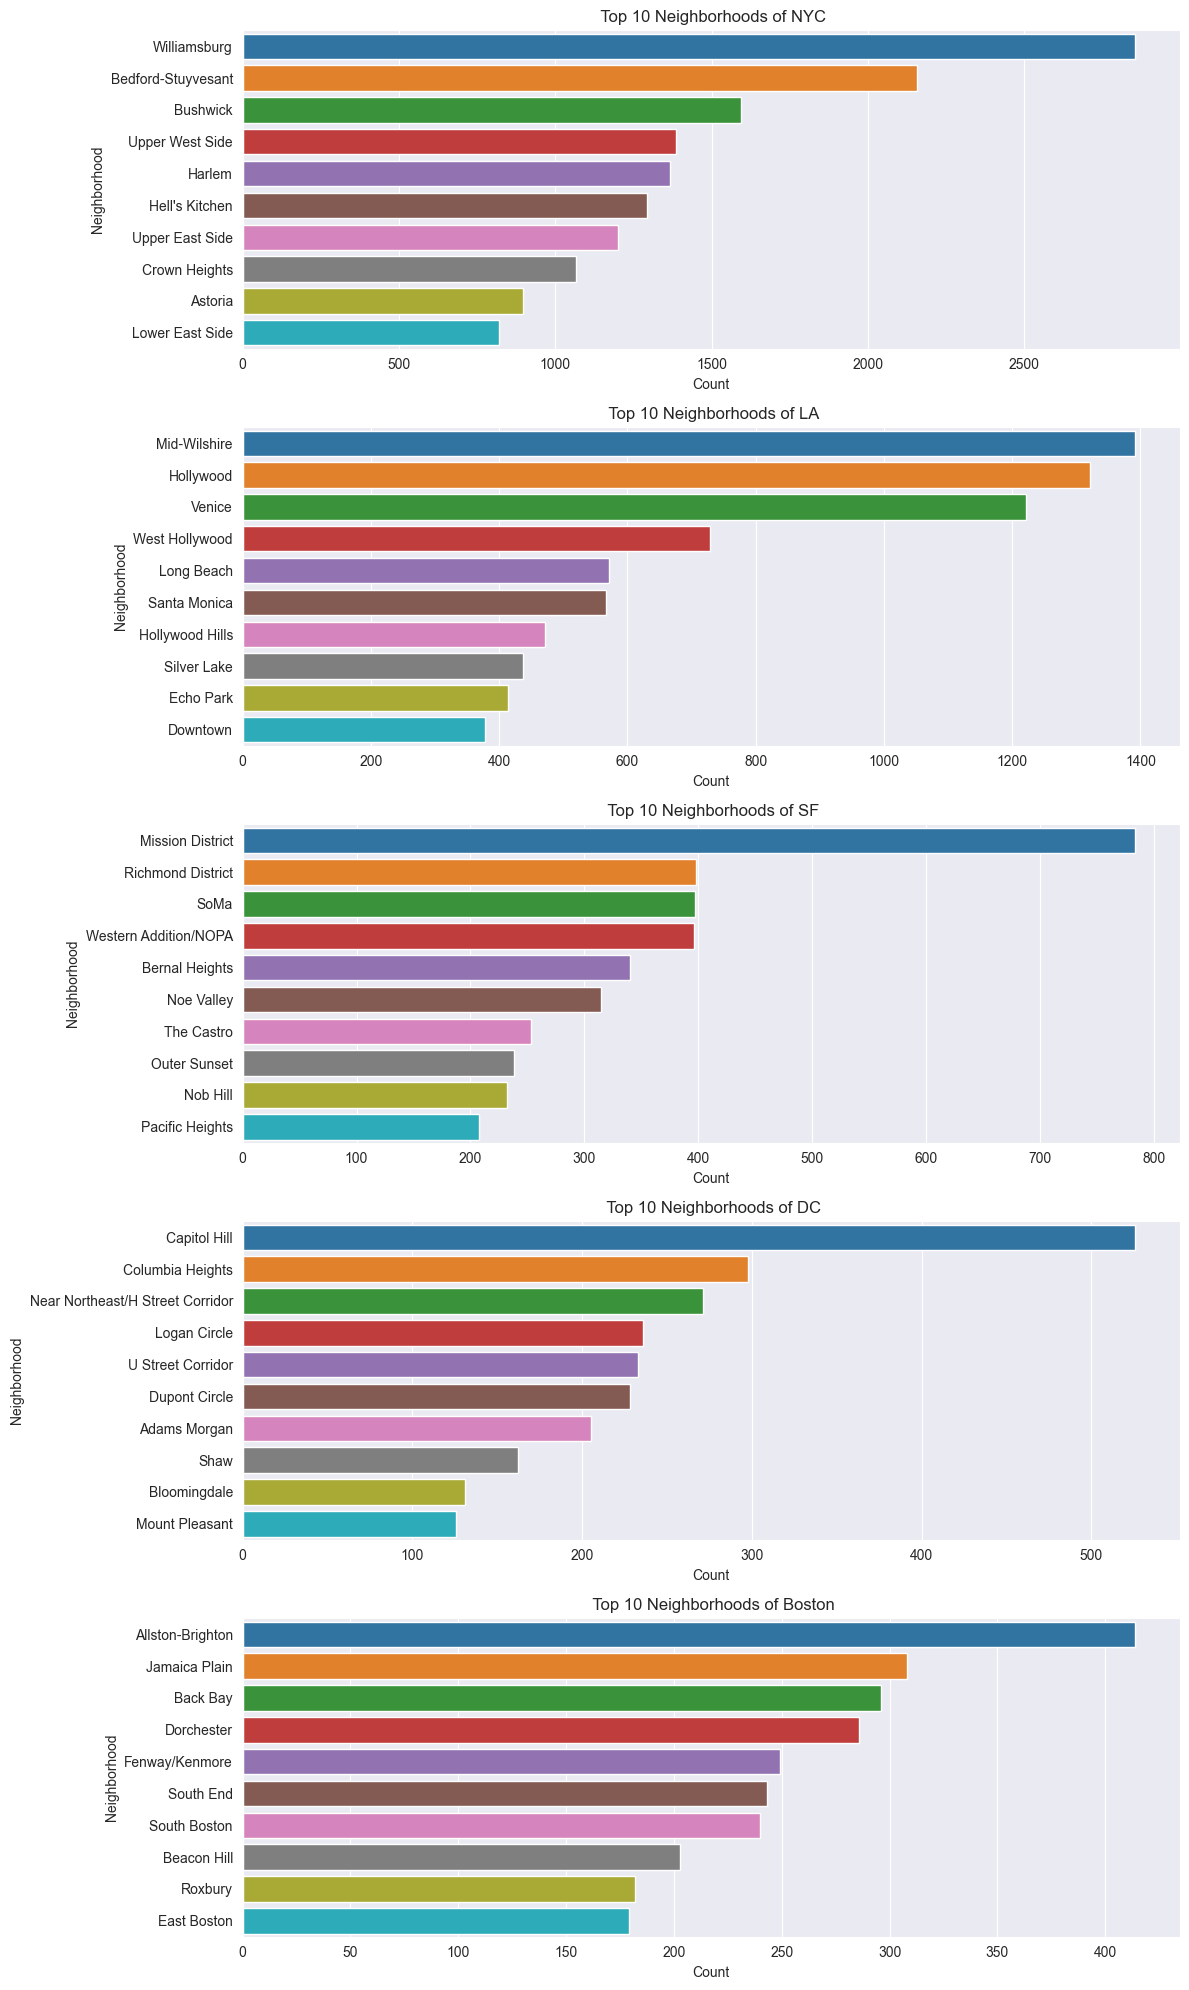

In [59]:



sns.set_style('darkgrid')

top_cities = df['City'].value_counts().head(5).index
fig, axes = plt.subplots(len(top_cities), 1, figsize=(12, 20))

for i, city in enumerate(top_cities):
    city_data = df[df['City'] == city]
    sns.countplot(ax=axes[i],palette='tab10', data=city_data, y='Neighbourhood', order=city_data['Neighbourhood'].value_counts().head(10).index)
    axes[i].set_title(f' Top 10 Neighborhoods of {city}')
    axes[i].set_xlabel('Count')
    axes[i].set_ylabel('Neighborhood')

plt.tight_layout()
plt.show()


#### what most customers will choose to stay as pricevise ?

Text(0.5, 1.0, 'average price across cities in AIRBNB Booking')

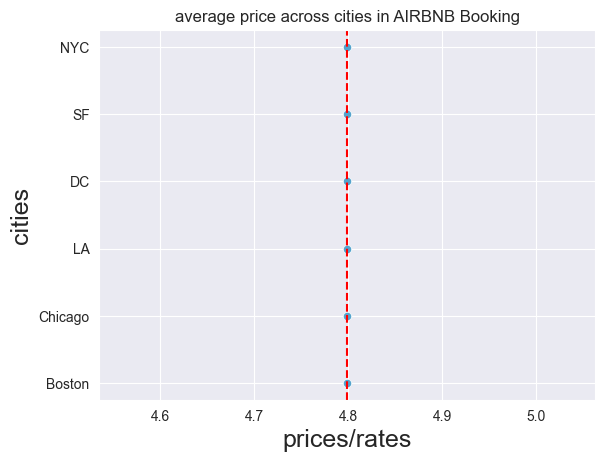

In [60]:
y_avg = df['Log_price'].mean()
sns.scatterplot(data=df,x=df['Log_price'].mean(),y=df['City'])
# plt.scatter(y=df['Log_price'].values)
plt.axvline(y_avg, color='red', linestyle='dashed')
plt.ylabel('cities',fontsize=18)
plt.xlabel('prices/rates',fontsize=18)
plt.title('average price across cities in AIRBNB Booking')


####  Average customers will choose to stay at a stay costing 4.5 $   to  5$

#### why do customers prefer apartment or house ?

In [61]:
apt_house = df[df['Property_type'].isin(['Apartment','House'])]


In [62]:
aparment= apt_house[apt_house['Property_type']=='Apartment']
house = apt_house[apt_house['Property_type']=='House']

<Axes: xlabel='Accommodates'>

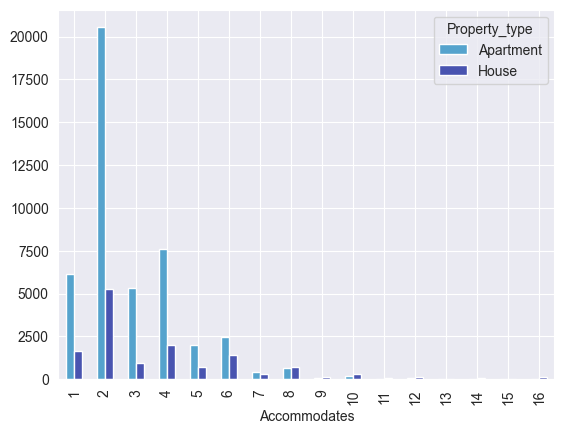

In [63]:
pd.crosstab(apt_house.Accommodates,apt_house.Property_type).plot(kind='bar')


##### Apartment with 2 persons is prefered more

In [64]:
def myfunc(val):
    if(val>0 and val<1):
        return('GRP1')
    elif(val>1 and val<2):
        return('GRP2')
    elif(val>2 and val <3):
        return('GRP3')
    elif(val>3 and val<4):
        return('GRP4')
    elif(val>4 and val <5):
        return('GRP5')
    elif(val>5 and val<6):
        return('GRP6')
    elif(val>6 and val<7):
        return('GRP7')
    else:
        return('GRP8')
df['grp']=df['Log_price'].apply(myfunc)

In [65]:
top_rooms=df[df['grp']=='GRP5']

In [66]:
df['grp'].value_counts()


grp
GRP5    34317
GRP6    21633
GRP4     7405
GRP7     3117
GRP8      413
GRP3      168
GRP2        1
Name: count, dtype: int64

C:\Users\aditya\AppData\Local\Temp\ipykernel_836\637337043.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Amenities',y=top_rooms['Log_price'],data=dfx,palette='Set2')


<Axes: xlabel='Amenities', ylabel='Log_price'>

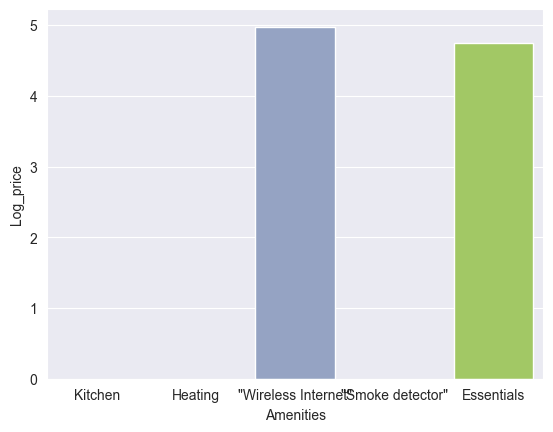

In [67]:
amenities_counts = apt_house['Amenities'].str.split(',').explode().value_counts()
top_5_amenities = amenities_counts.head(5)
dfx=top_5_amenities.reset_index(name="val")
sns.barplot(x='Amenities',y=top_rooms['Log_price'],data=dfx,palette='Set2')

#### every apartment and house between 4-5 $ have wifi and home essentionls provided


#### All the above observations and finding show that Houses or Apartments in New York and Los angeles between price ranges 4.5$ to 5$ are customers choice
#### Both new york and los angeles are famous tourist spots and new york is smaller in size but has more population And while the cost of living and housing prices in NYC are much higher than cities nearby of similar sizes, the city still offers plenty of job opportunities to create a great career, fun things to do, a great cuisine, and a variety of ways to enjoy the outdoors among many other perks.
#### Los Angeles, on the other hand, is a sprawling city with a more relaxed pace of life. The cost of living in LA is lower than in NYC, but still relatively high compared to other
#### In these cities more tourists and immigrants are living there and what they need most is internet connection and home essentials to get them settled for a while and for there purposeses they only need to spent minimum on there accomodation because for tourist they are mostly outside and for workers they are at there work place  

### SUGGESTIONS
#### PROVIDE MORE AFFORDABLE (4$-5$) HOUSE / APARTMENT FOR 2 PEOPLE IN BOTH THE CITIES 